In [3]:
from urllib.request import urlretrieve
from pyopenms import *
gh="https://raw.githubusercontent.com/OpenMS/pyopenms-extra/master"
urlretrieve(gh+"/src/data/YIC(Carbamidomethyl)DNQDTISSK.mzML","observed.mzML")
exp=MSExperiment()
MzMLFile().load("observed.mzML",exp)
spectra=exp.getSpectra()
observed_spec=spectra[0]

tsg=TheoreticalSpectrumGenerator()
theo_spectrum=MSSpectrum()
p=tsg.getParameters()
p.setValue("add_y_ions","true")
p.setValue("add_b_ions","true")
p.setValue("add_metainfo","true")
tsg.setParameters(p)
peptide=AASequence.fromString("YIC(Carbamidomethyl)DNQDTISSK")
tsg.getSpectrum(theo_spectrum,peptide,1,2)

212.012451171875
795.2837524414062


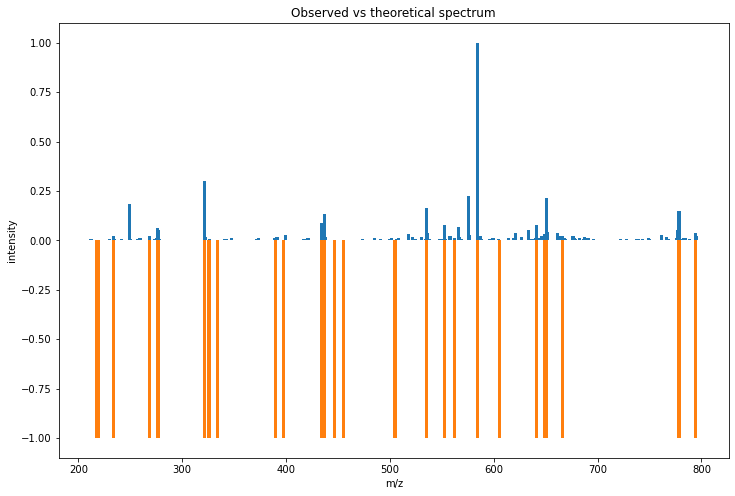

In [5]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz,obs_int,theo_mz,theo_int,title):
    obs_int=[element/max(obs_int)for element in obs_int]
    theo_int=[element*-1 for element in theo_int]
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz,obs_int,width=3.0)
    plt.bar(theo_mz,theo_int,width=3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
obs_mz,obs_int=observed_spec.get_peaks()

print(min(obs_mz))
print(max(obs_mz))
theo_mz,theo_int=[],[]
for mz,intensity in zip(*theo_spectrum.get_peaks()):
    if mz>=200.0 and mz<=800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)
title='Observed vs theoretical spectrum'
mirror_plot(obs_mz,obs_int,theo_mz,theo_int,title)

In [8]:
alignment=[]
spa=SpectrumAlignment()
p=spa.getParameters()
p.setValue("tolerance",0.5)
p.setValue("is_relative_tolerance","false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment,theo_spectrum,observed_spec)

print("Number of matched peaks:"+str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")
for theo_idx,obs_idx in alignment:
    ion_name=theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge= theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name+"/t"+str(ion_charge)+"/t"
    +str(theo_spectrum[theo_idx].getMZ())
    +"/t"+str(observed_spec[obs_idx].getMZ()))

Number of matched peaks:16
ion	theo. m/z	observed m/z
y2+/t1/t234.14483407287105/t234.12303161621094
y5++/t2/t268.157941636671/t268.1054382324219
b2+/t1/t277.15467010477096/t277.24560546875
y3+/t1/t321.17686323237103/t321.2969970703125
y4+/t1/t434.26092758327104/t434.2879638671875
b3+/t1/t437.18531908997096/t437.291259765625
y5+/t1/t535.308606806571/t535.18896484375
b4+/t1/t552.212263249471/t552.3375244140625
b9++/t2/t562.239866948271/t562.4213256835938
y10++/t2/t584.250963512071/t584.4120483398438
y11++/t2/t640.792995687521/t640.9539184570312
b11++/t2/t649.2718961077711/t649.0973510742188
y6+/t1/t650.335550966071/t650.3652954101562
b5+/t1/t666.255191440871/t666.1763305664062
y7+/t1/t778.394129221271/t778.3391723632812
b6+/t1/t794.3137696960711/t794.192138671875


In [ ]:
theo_mz,theo_int,obs_mz,obs_int=[],[],[],[]
for theo_idx,obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spec[obs_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
title='Observed vs theoretical spectrum'
mirror_plot(obs_mz,obs_int,theo_mz,theo_int,title)